In [51]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

In [75]:
from math import exp

def sigmoid(x):
    return 1/(1 + exp(-x))

class MyLinnearRegressor:

    def __init__(self) -> None:
        self.W = []
        self.dict = {}
        
    def train(self, input_set, output_set, learning_rate=0.001, noEpochs=100):
        count = 0
    
        for value in set(output_set):
            self.dict[value] = count
            count += 1
        
        X = [[1] + line for line in input_set]
        m = len(X[0])
        for i in range(m):
            self.W.append(np.random.random())

        for _ in range(noEpochs):
            errors = []
            for i in range(m):
                errors.append(0.0)

            for input_line, output_line in zip(X, output_set):

                prediction = sum(input_line[j] * self.W[j] for j in range(m))
                error = self.dict[output_line] - prediction

                for j in range(m):
                    errors[j] += error * input_line[j]

            for j in range(m):
                self.W[j] += learning_rate * errors[j] / len(input_set)

    def find_key_by_value(self,value):
        for key in self.dict.keys():
            if self.dict[key] == value:
                return key
        return None

    def predict(self, input_set):
        X = [[1] + line for line in input_set]
        output_set = []
        for line in X:
            value = sum([w*v for w,v in zip(self.W,line)])
            if value > 0.5:
                output_set.append(self.find_key_by_value(1))
            else:
                output_set.append(self.find_key_by_value(0))
                
        return output_set

In [76]:
from sklearn.preprocessing import normalize
def read_datas():
    breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)   
    X = breast_cancer_wisconsin_diagnostic.data.features 
    y = breast_cancer_wisconsin_diagnostic.data.targets 

    # new_data = {
    #     'Radius': normalize([X['radius1']])[0],
    #     'Texture': normalize([X['texture1']])[0],
    #     'Diagnosis': y['Diagnosis']
    # }

    new_data = {
        'Radius': X['radius1'],
        'Texture': X['texture1'],
        'Diagnosis': y['Diagnosis']
    }

    df = pd.DataFrame(new_data)

    return df
    

In [77]:
df = read_datas()
df

,Radius,Texture,Diagnosis
0,17.99,10.38,M
1,20.57,17.77,M
2,19.69,21.25,M
3,11.42,20.38,M
4,20.29,14.34,M
...,...,...,...
564,21.56,22.39,M
565,20.13,28.25,M
566,16.60,28.08,M
567,20.60,29.33,M


In [78]:
def getTrainingAndValidationData():
    df = read_datas()

    dataSize = df.shape[0]
    trainingIndexSet = np.random.choice(range(dataSize),size=int(0.8 * dataSize),replace=False)
    validationIndexSet = [i for i in range(dataSize) if i not in trainingIndexSet] 

    trainingInputSet = [[df['Radius'].iloc[i],df['Texture'].iloc[i]] for i in trainingIndexSet]
    trainingOutputSet = [df['Diagnosis'].iloc[i] for i in trainingIndexSet]

    validationInputSet = [[df['Radius'].iloc[i],df['Texture'].iloc[i]] for i in validationIndexSet]
    validationOutputSet = [df['Diagnosis'].iloc[i] for i in validationIndexSet]

    return trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet    

def getRegressorTool():
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationData()
    xx = [el for el in trainingInputSet]

    regressor = SGDClassifier()
    regressor.fit(xx, trainingOutputSet)

    return regressor


def getMyRegressor():
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationData()
    xx = [el for el in trainingInputSet]

    regressor = MyLinnearRegressor()
    regressor.train(xx, trainingOutputSet,noEpochs=2000)

    return regressor

In [98]:
def dataDistribution():
    df = read_datas()
    fig,axes = plt.subplots(nrows=3,figsize=(15,15))
    axes[0].hist(df['Radius'])
    axes[0].set_title('Radius')
    axes[1].hist(df['Texture'])
    axes[1].set_title('Texture')
    axes[2].hist(df['Diagnosis'])
    axes[2].set_title('Diagnosis')
    plt.show()
    
def plotData():
    df = read_datas()
    fig,axes = plt.subplots(nrows=1,figsize=(5,5))
    radius = df['Radius']
    texture = df['Texture']
    diagnosis = df['Diagnosis']
    m_index = [i for i in range(0, len(diagnosis)) if diagnosis[i] == 'M']
    b_index = [i for i in range(0, len(diagnosis)) if diagnosis[i] == 'B']
    m_radius = [radius[index] for index in m_index]
    b_radius = [radius[index] for index in b_index]
    m_texture = [texture[index] for index in m_index]
    b_texture = [texture[index] for index in b_index]
    axes.plot(m_radius,m_texture,'ro')
    axes.plot(b_radius,b_texture,'b*')
    plt.show()



## Data distribution

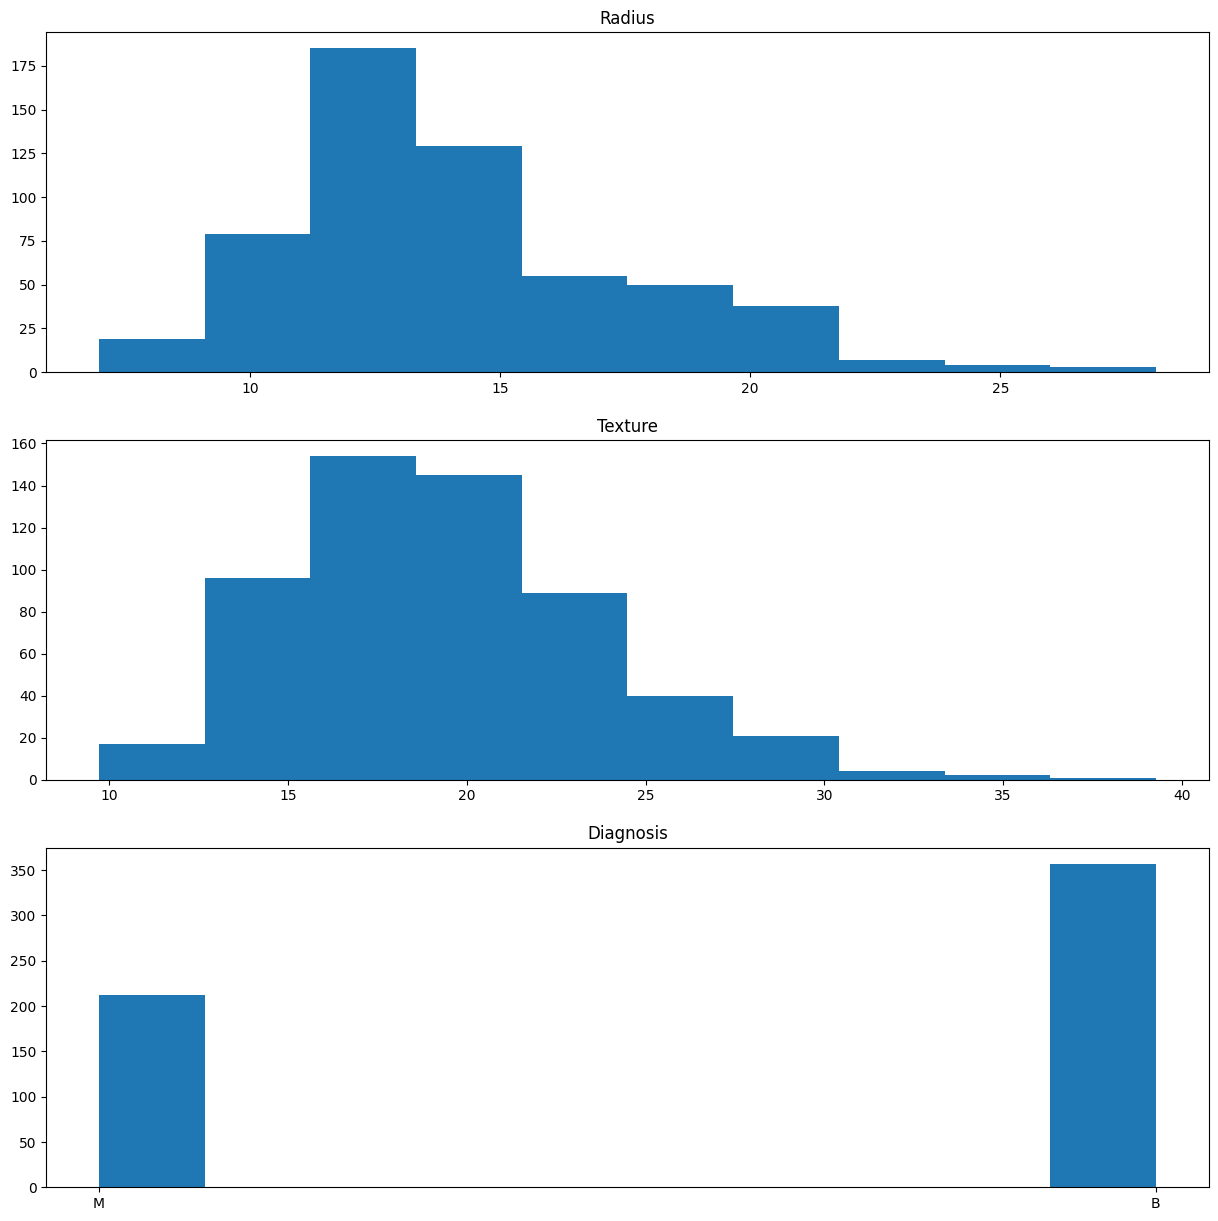

In [89]:
dataDistribution()

## Plot data

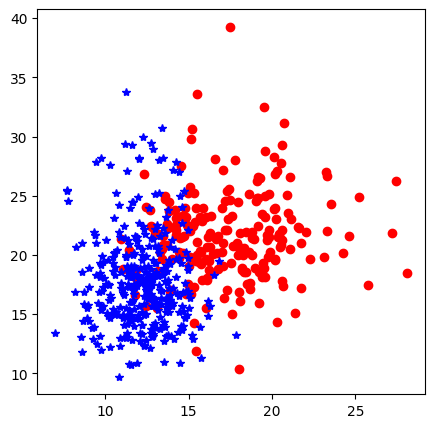

In [99]:
plotData()

In [79]:
# consideram M - positive
def get_TP_TN_FP_FN(computedValues,groundTruth):
    TP,TN,FP,FN = 0,0,0,0
    for cv,gtv in zip(computedValues, groundTruth):
        if cv == 'M':
            if gtv == 'M':
                TP += 1
            else:
                FP += 1
        else:
            if gtv == 'M':
                FN += 1
            else:
                TN += 1
    return TP,TN,FP,FN

def getAccuracy(TP,TN,FP,FN):
    if TP+TN+FP+FN == 0:
        return 0
    return (TP + TN) / (TP+TN+FP+FN)

def getPrecision(TP,TN,FP,FN):
    if TP + FP == 0:
        return 0
    return TP/(TP + FP)

def getRecall(TP,TN,FP,FN):
    if TP+FN == 0:
        return 0
    return TP/(TP+FN)

In [80]:
regressor = getRegressorTool()

_,_,validationInputSet,validationOutputSet = getTrainingAndValidationData()

computedOutputSet = regressor.predict(validationInputSet)
TP,TN,FP,FN = get_TP_TN_FP_FN(computedOutputSet, validationOutputSet)
acc = getAccuracy(TP,TN,FP,FN)
precision = getPrecision(TP,TN,FP,FN)
recall = getRecall(TP,TN,FP,FN)
print("TP: {}; TN: {}; FP: {}; FN: {}\nAccuracy: {}\nPrecision: {}\nRecall: {}".format(TP,TN,FP,FN,acc,precision,recall))

TP: 34; TN: 73; FP: 1; FN: 6
Accuracy: 0.9385964912280702
Precision: 0.9714285714285714
Recall: 0.85


In [84]:
myregressor = getMyRegressor()
computedOutputSet = myregressor.predict(validationInputSet)

TP,TN,FP,FN = get_TP_TN_FP_FN(computedOutputSet, validationOutputSet)
acc = getAccuracy(TP,TN,FP,FN)
precision = getPrecision(TP,TN,FP,FN)
recall = getRecall(TP,TN,FP,FN)
print("TP: {}; TN: {}; FP: {}; FN: {}\nAccuracy: {}\nPrecision: {}\nRecall: {}".format(TP,TN,FP,FN,acc,precision,recall))

TP: 23; TN: 67; FP: 7; FN: 17
Accuracy: 0.7894736842105263
Precision: 0.7666666666666667
Recall: 0.575


Stabiliti daca o leziune (dintr-o mamografie) caracterizata printr-o textura de valoare 10 si o raza de valoare 18 este leziune maligna sau benigna

In [82]:
regressor = getRegressorTool()
myregressor = getMyRegressor()

value = [[18,10]]
toolOutput = regressor.predict(value)
myOutput = myregressor.predict(value)

print("Tool prediction: {}\nMy prediction: {}".format(toolOutput[-1],myOutput[-1]))

Tool prediction: M
My prediction: M
